## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

#### Imporrting Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [2]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv", delimiter=' *, *', engine='python')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking Datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### About Dataset :

- Target : 
    
    - Churn : Whether a customer stopped using services or not. 
    
- Features :
     - gender : Male, Female
     - SeniorCitizen : 0 - No, 1 - Yes
     - Partner : Yes, No
     - Dependents : Yes, No
     - tenure : 1-72
     - PhoneService : Yes, No
     - MultipleLines : Yes, No, No Phone Service
     - InternetService : DSL, FibreOptic, No
     - OnlineSecurity : Yes, No , No Internet Service
     - OnlineBackup :  Yes, No , No Internet Service
     - DeviceProtection :  Yes, No , No Internet Service
     - TechSupport :  Yes, No , No Internet Service
     - StreamingTV :  Yes, No , No Internet Service
     - StreamingMovies :  Yes, No , No Internet Service
     - Contract : 1 year,  2 year, Month-to-month
     - PaperlessBilling :  Yes, No
     - PaymentMethod : Electronic Check, Mailed Check, Bank Transfer(Automatic), Credit Card(Automatic) 
     - MonthlyCharges : Continuous data
     - TotalCharges : Continous data

## Exploratory Data Analysis (EDA)

In [4]:
# Shape of dataset
print('Shape of our Dataset is - Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Shape of our Dataset is - Rows: 7043 Columns: 21


In [5]:
#Checking for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Dropping null values
df.dropna(inplace = True)

In [7]:
#Checking for duplicate record/fields
df.duplicated().sum()

0

In [8]:
#Statistical Overview of our Numerical Features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


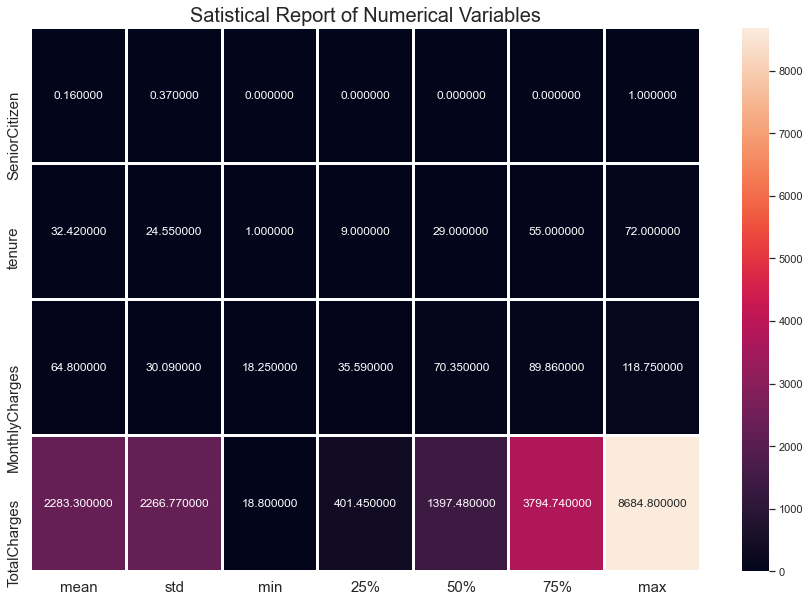

In [9]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables",fontsize = 20)
plt.show()

- Tenure : 
    - mean : 32.42
    - std : 24.55
    - max : 72
    - min : 1
    
    
    
- Monthly Charges :
    - mean : 64.80
    - std : 30.09
    - max : 118.75
    - min : 18.25
    
    
    
- Total Charges :
    - mean : 2283.30
    - std : 2266.77
    - max : 8684.80
    - min : 18.80
     

### Univariate Analysis

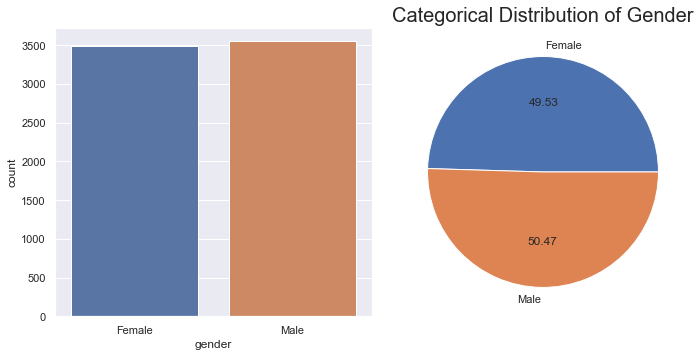

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['gender'], ax = ax[0])
df.groupby('gender').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Gender", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

- We've almost 50% distribution of both genders. 

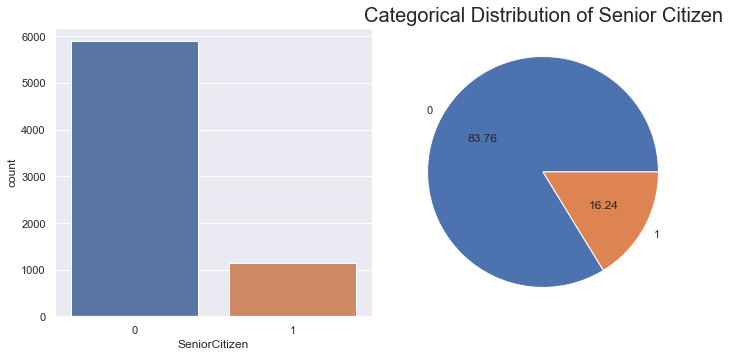

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['SeniorCitizen'], ax = ax[0])
df.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Senior Citizen", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Only 16.21% of customers are senior citizens.

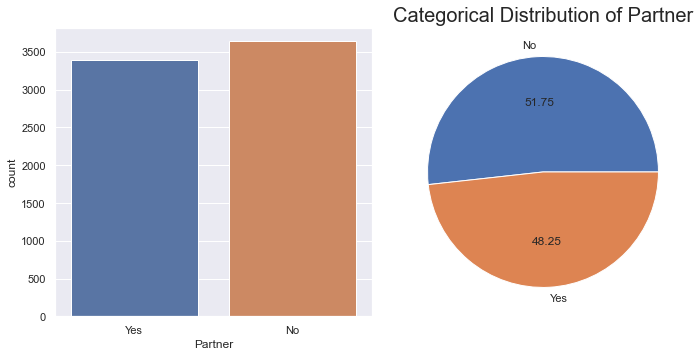

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Partner'], ax = ax[0])
df.groupby('Partner').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Partner", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Almost equal distribution of customers with partners and customers without partners.

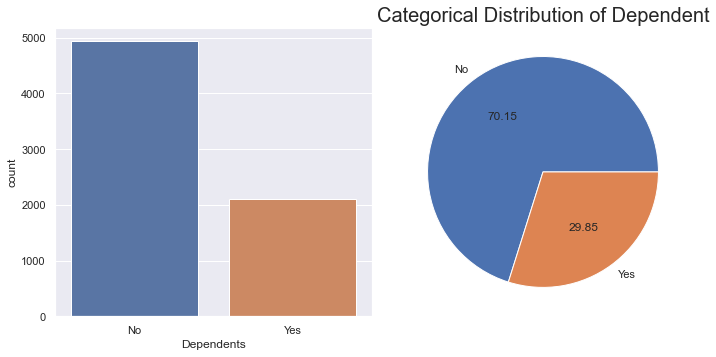

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Dependents'], ax = ax[0])
df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Dependent", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Only 29.96% customers have dependents.

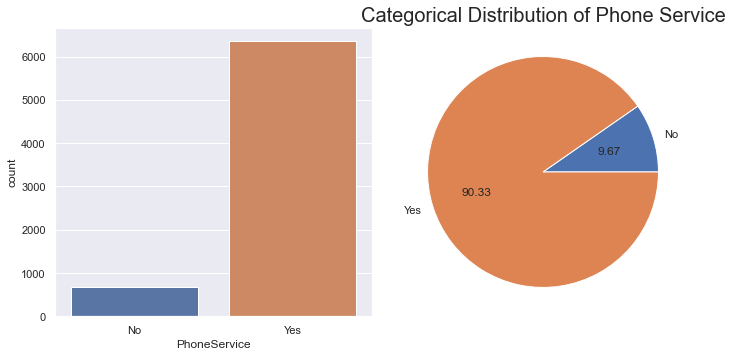

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['PhoneService'], ax = ax[0])
df.groupby('PhoneService').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Phone Service", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- 90% of customers have phone services. 

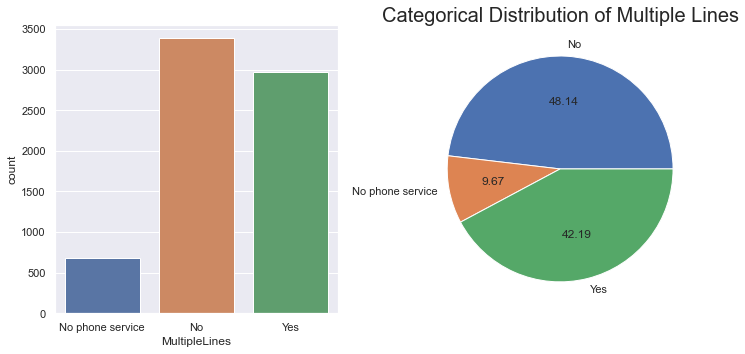

In [15]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['MultipleLines'], ax = ax[0])
df.groupby('MultipleLines').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Multiple Lines", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Majority(48.13%) of customers don't have multiple lines.

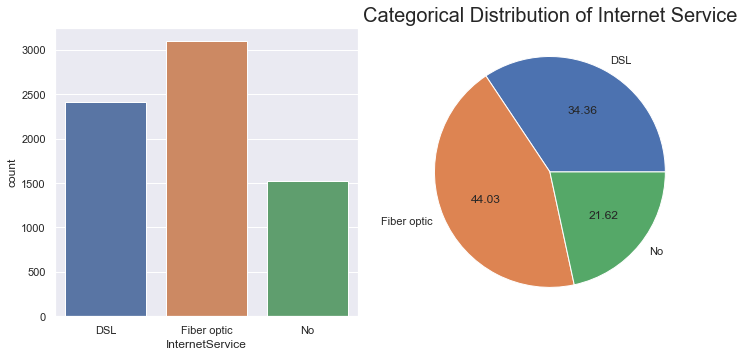

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['InternetService'], ax = ax[0])
df.groupby('InternetService').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Internet Service", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Majority of customers(43.96%) use Fibre Optic Internet Services.

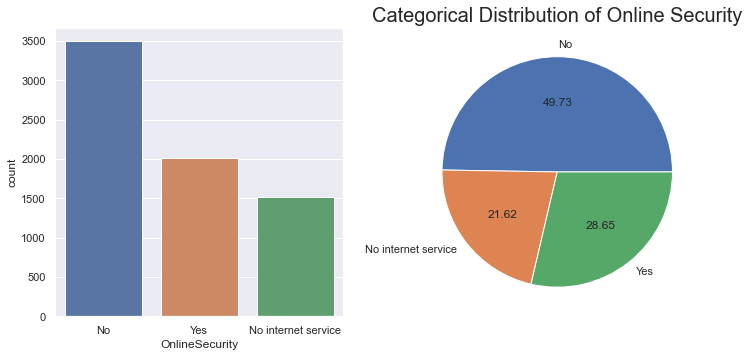

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['OnlineSecurity'], ax = ax[0])
df.groupby('OnlineSecurity').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Online Security", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- almost 50% of customers don't have internet security.

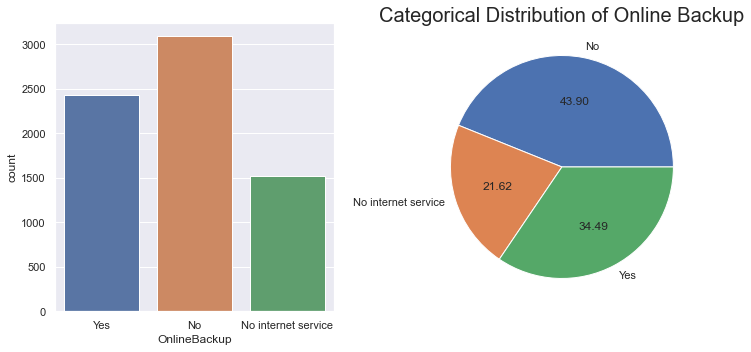

In [18]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['OnlineBackup'], ax = ax[0])
df.groupby('OnlineBackup').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Online Backup", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- 43.84% of customers don't have any Online Backup.

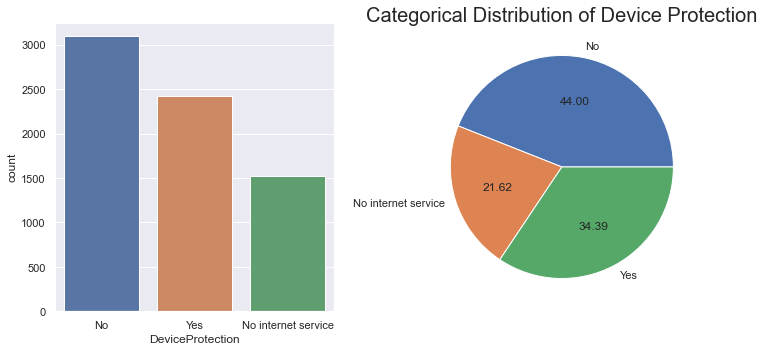

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['DeviceProtection'], ax = ax[0])
df.groupby('DeviceProtection').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Device Protection", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- 43.94% of customers don't have device protection.

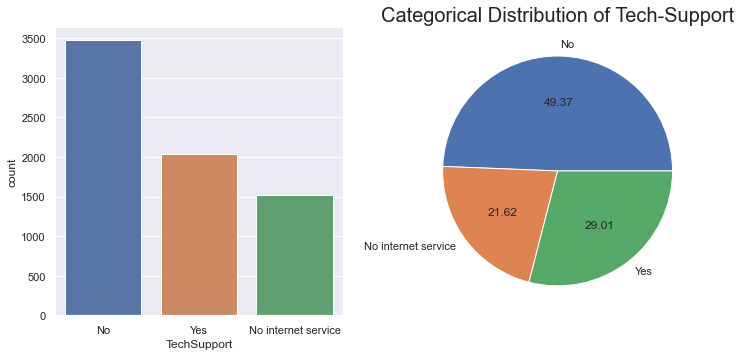

In [20]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['TechSupport'], ax = ax[0])
df.groupby('TechSupport').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Tech-Support", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- 49.31% of customers don't have any Tech Support.

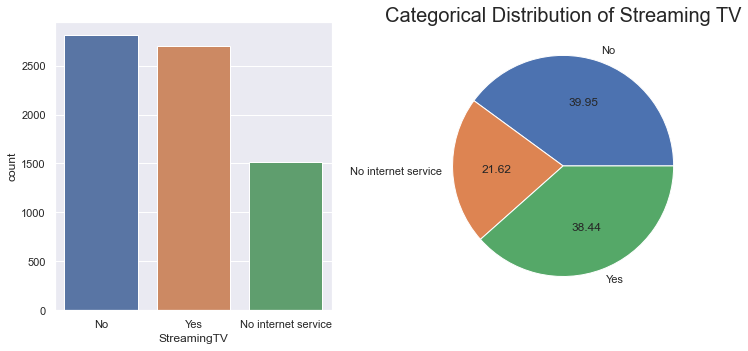

In [21]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['StreamingTV'], ax = ax[0])
df.groupby('StreamingTV').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Streaming TV", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- 39.90% of customers don't have Streaming TV.

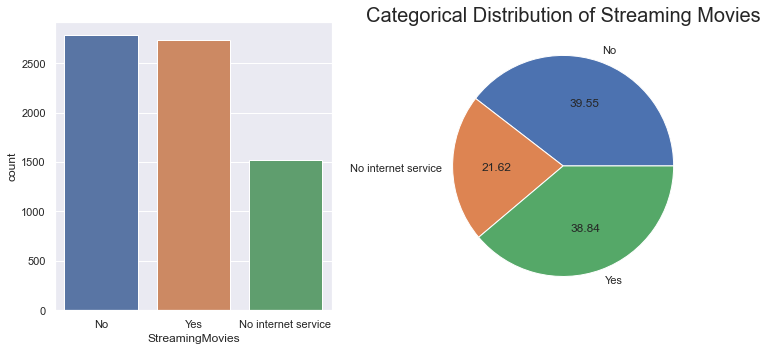

In [22]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['StreamingMovies'], ax = ax[0])
df.groupby('StreamingMovies').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Streaming Movies", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()


- 39.54% of customers don't have Streaming Movies.

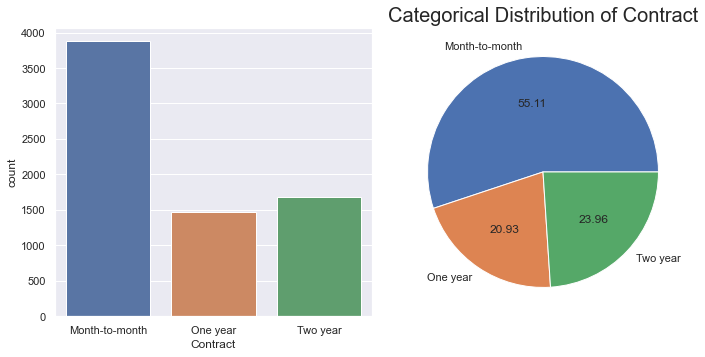

In [23]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Contract'], ax = ax[0])
df.groupby('Contract').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Contract", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- more than 50% of customers opt for Month-to-month contract.

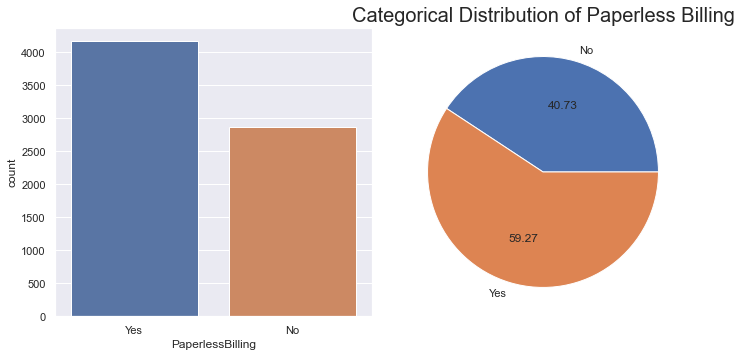

In [24]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['PaperlessBilling'], ax = ax[0])
df.groupby('PaperlessBilling').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Paperless Billing", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- Almost 60% of customers prefer paperless Billing.

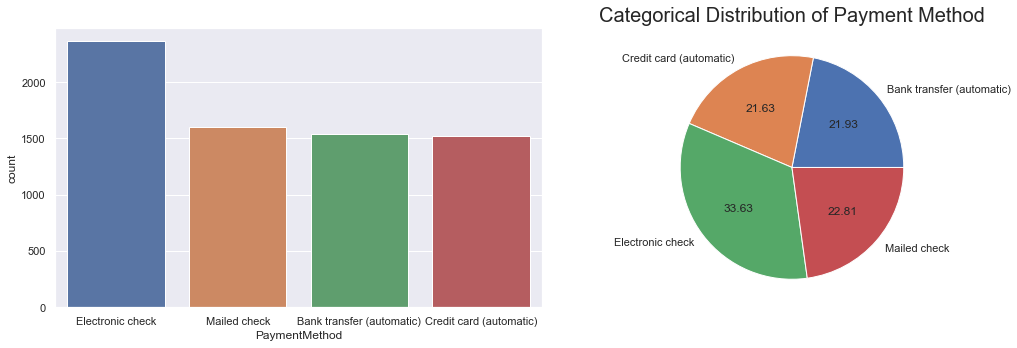

In [25]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(df['PaymentMethod'], ax = ax[0])
df.groupby('PaymentMethod').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Payment Method", fontsize = 20)


plt.ylabel(None)
plt.tight_layout()

- Electronic Check is the most preferred payment option and credit card is least preferred.

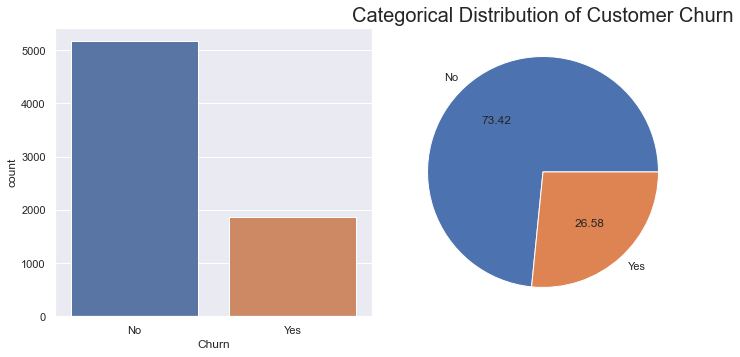

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Churn'], ax = ax[0])
df.groupby('Churn').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Customer Churn", fontsize = 20)

plt.ylabel(None)
plt.tight_layout()

- There is a class imbalance in our target variable.

Text(0.5, 1.0, 'Distribution of Tenure')

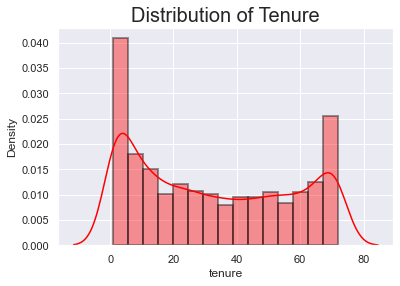

In [27]:
sns.distplot(df['tenure'], color = 'red',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Tenure", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Monthly Charges')

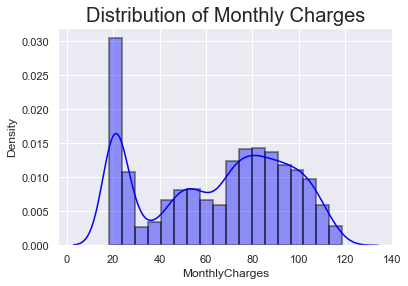

In [28]:
sns.distplot(df['MonthlyCharges'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Monthly Charges", fontsize = 20)

Text(0.5, 1.0, 'Distribution of TotalCharges')

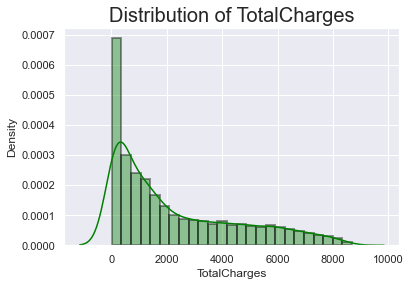

In [29]:
sns.distplot(df['TotalCharges'], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of TotalCharges", fontsize = 20)

- We've rightly - skewed Data.

### Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Churn over Gender')

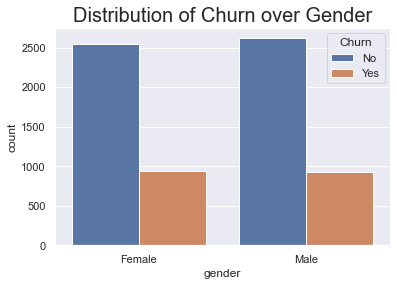

In [30]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'gender')
plt.title("Distribution of Churn over Gender", fontsize = 20)

- Churn is likely to be equal in both genders.

Text(0.5, 1.0, 'Distribution of Churn over Partner')

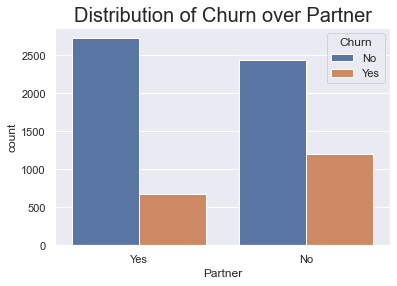

In [31]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'Partner')
plt.title("Distribution of Churn over Partner", fontsize = 20)

- Customer with no partners more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Senior Citizen')

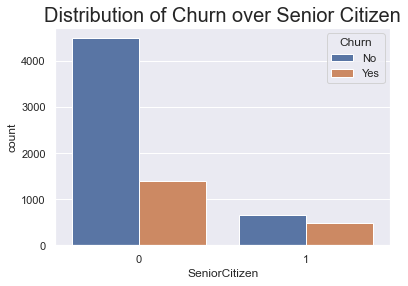

In [32]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'SeniorCitizen')
plt.title("Distribution of Churn over Senior Citizen", fontsize = 20)

- Customer who are not Senior Citizens are more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Dependents')

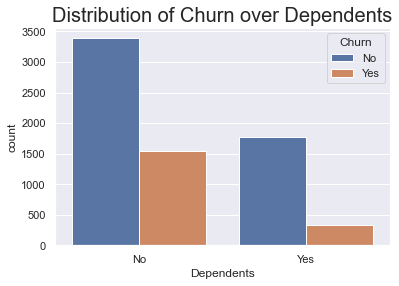

In [33]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'Dependents')
plt.title("Distribution of Churn over Dependents", fontsize = 20)

- - Customer with no dependents more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Internet Service')

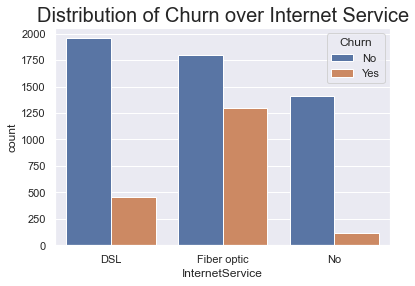

In [34]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'InternetService')
plt.title("Distribution of Churn over Internet Service", fontsize = 20)

- - Customer with Fibre Optic Internet Services are more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Contract')

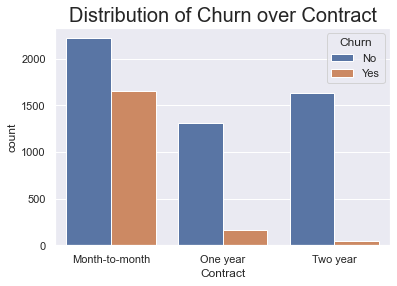

In [35]:
sns.countplot(data = df , hue = 'Churn' ,  x = 'Contract')
plt.title("Distribution of Churn over Contract", fontsize = 20)

- Customer with Month-to-month contract are more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Payment Method')

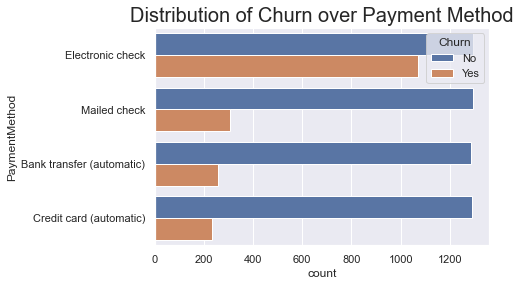

In [36]:
sns.countplot(data = df , hue = 'Churn' ,  y = 'PaymentMethod')
plt.title("Distribution of Churn over Payment Method", fontsize = 20)

- Customer choosing Electronic Check as payment mode are more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Multiple Lines')

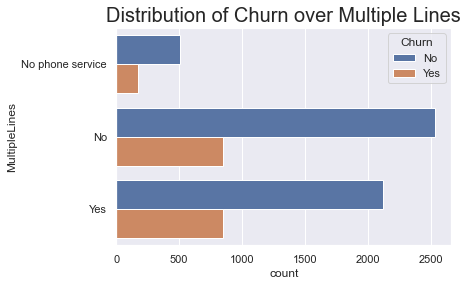

In [37]:
sns.countplot(data = df , hue = 'Churn' ,  y = 'MultipleLines')
plt.title("Distribution of Churn over Multiple Lines", fontsize = 20)

- Customer with no Multiple lines are more likely to cause customer Churn.

Text(0.5, 1.0, 'Distribution of Churn over Tenure')

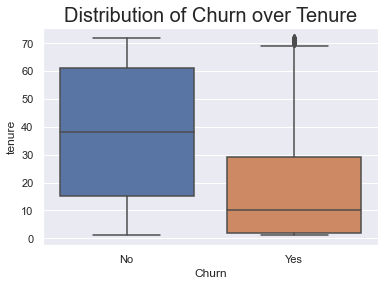

In [38]:
sns.boxplot(data = df, x = 'Churn', y = 'tenure')
plt.title("Distribution of Churn over Tenure", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Churn over Monthly Charges')

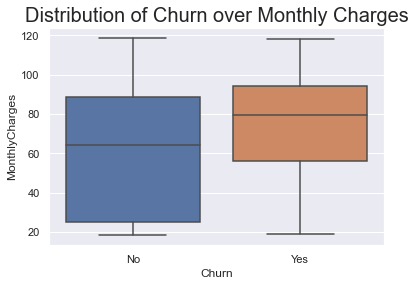

In [39]:
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges')
plt.title("Distribution of Churn over Monthly Charges", fontsize = 20)

- Customer with Monthly charges between 55 - 85 are more likely to cause customer Churn.      1

Text(0.5, 1.0, 'Distribution of Churn over Total Charges')

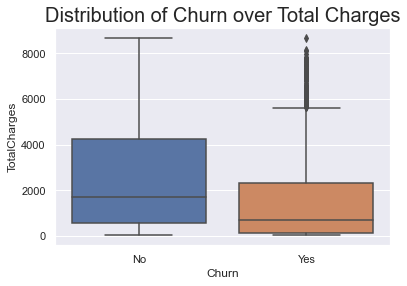

In [40]:
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges')
plt.title("Distribution of Churn over Total Charges", fontsize = 20)

- Customer with Total charges between 0 - 2200 are more likely to cause customer Churn.             

Text(0.5, 1.0, 'Correlation of Montly Charges and Total Charges over Churn')

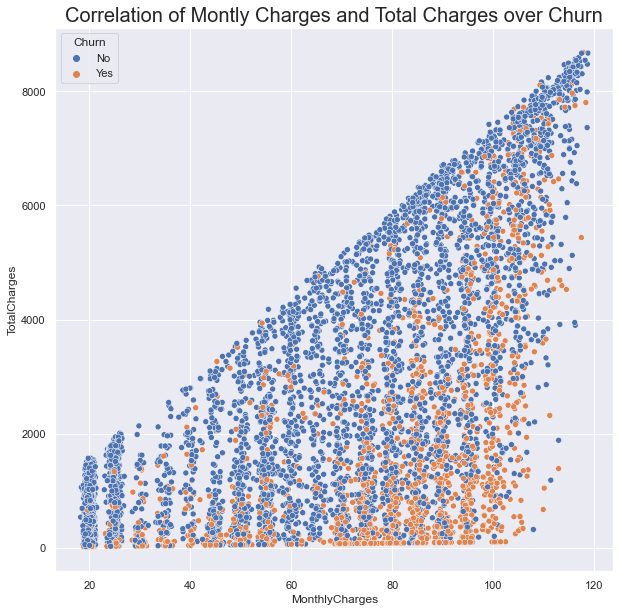

In [41]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn')
plt.title("Correlation of Montly Charges and Total Charges over Churn", fontsize = 20)

- Customer Churn reduces as the total charges increases, whereas Customer churn increases as monthly charges increases. 
- Montly charges and total charges are positively correlated.

Text(0.5, 1.0, 'Correlation of Montly Charges and Tenure over Churn')

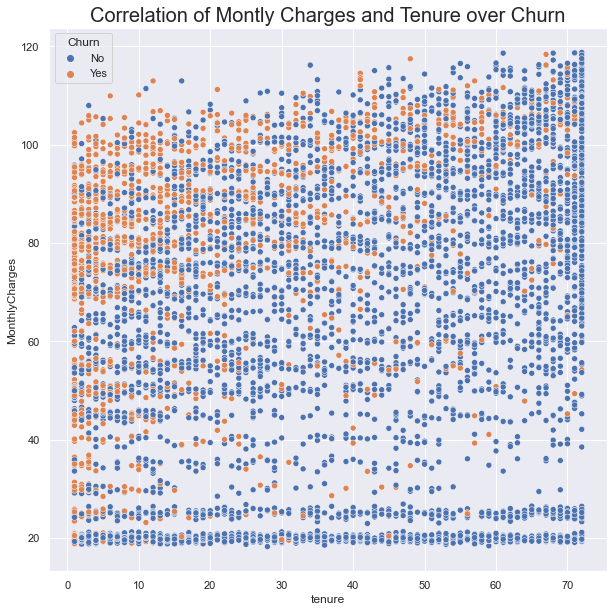

In [42]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, y = 'MonthlyCharges', x = 'tenure', hue = 'Churn')
plt.title("Correlation of Montly Charges and Tenure over Churn", fontsize = 20)

- Chrun increases as the Monthly Charges increases whereas there is more churn when tenure is between 0- 30.
- No correlation between monthly charges and tenure

Text(0.5, 1.0, 'Correlation of Total Charges and Tenure over Churn')

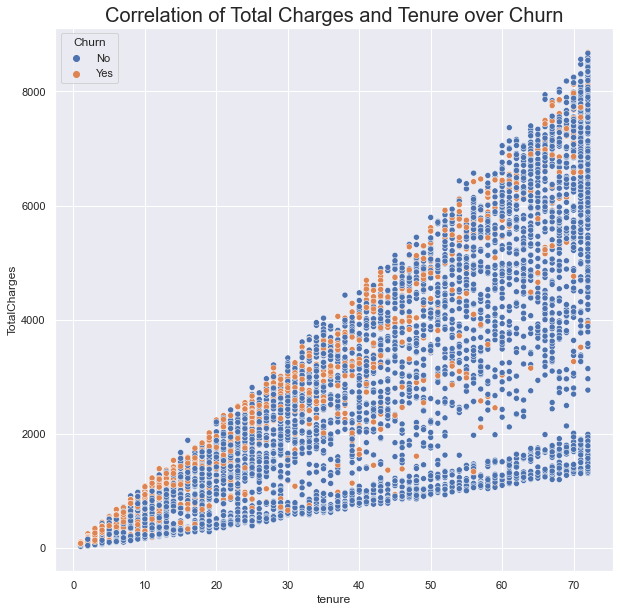

In [43]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, y = 'TotalCharges', x = 'tenure', hue = 'Churn')
plt.title("Correlation of Total Charges and Tenure over Churn", fontsize = 20)

- Churn is more when both tenure and total charges is less. Churn reduces as both Tenure and Total Charges increases.
- Positive Correlation between tenure and Total charges

### Multivariate Analysis

In [44]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


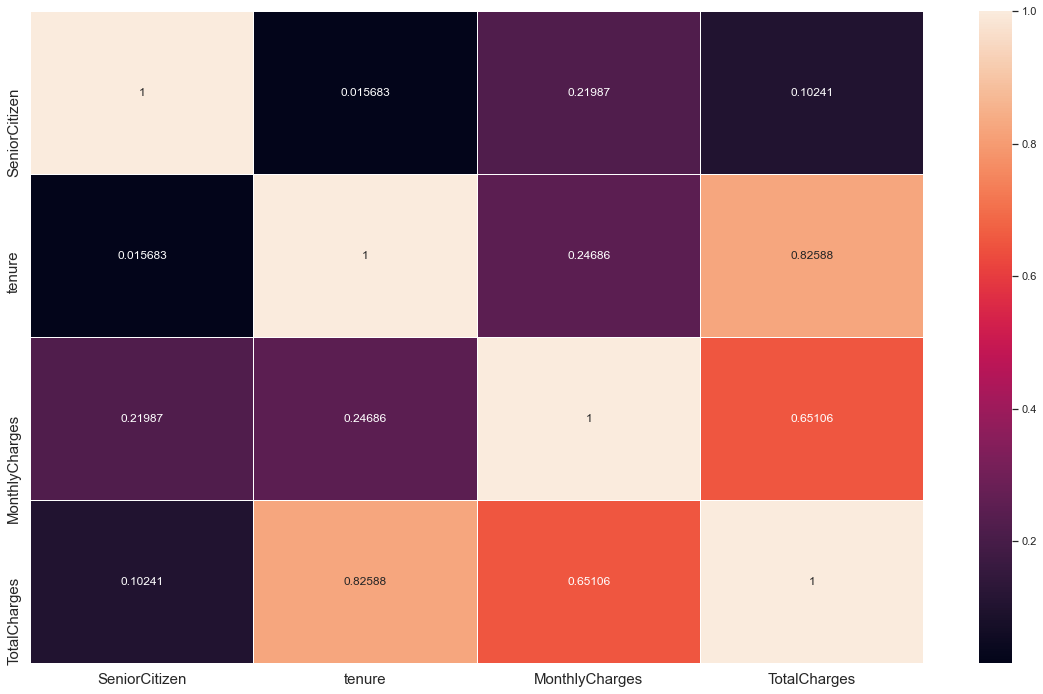

In [45]:
#plotting correlation table
plt.figure(figsize = [20,12])
sns.heatmap(df.corr(), annot = True,linewidths=0.1,fmt = '.5g' )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

- Monthly Charges and tenure have high positive correlation of 0.82588.
- Monthly Charges and Total Charges have moderate positive correlation of 0.65106.

### Data Cleaning

In [46]:
#Dropping Nominal Data
df.drop("customerID", axis = 1, inplace = True)

__Encoding our dataset__

In [47]:
#Instantiating Label Encoder
enc = LabelEncoder()

In [48]:
#Encoding all our Categorical Data
df['gender'] = enc.fit_transform(df['gender'])
df['Partner'] = enc.fit_transform(df['Partner'])
df['Dependents'] = enc.fit_transform(df['Dependents'])
df['PhoneService'] = enc.fit_transform(df['PhoneService'])
df['MultipleLines'] = enc.fit_transform(df['MultipleLines'])
df['InternetService'] = enc.fit_transform(df['InternetService'])
df['OnlineSecurity'] = enc.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = enc.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = enc.fit_transform(df['DeviceProtection'])
df['TechSupport'] = enc.fit_transform(df['TechSupport'])
df['StreamingTV'] = enc.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = enc.fit_transform(df['StreamingMovies'])
df['Contract'] = enc.fit_transform(df['Contract'])
df['PaperlessBilling'] = enc.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = enc.fit_transform(df['PaymentMethod'])
df['Churn'] = enc.fit_transform(df['Churn'])

In [49]:
# Splitting our dataset in features and target 
X = df.drop('Churn', axis =1)
y = df['Churn']

<AxesSubplot:xlabel='Churn', ylabel='count'>

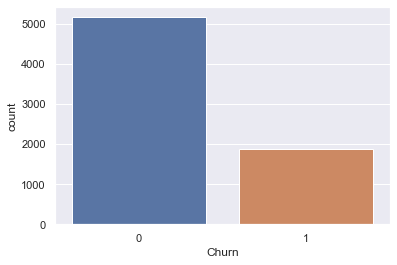

In [50]:
#Visualizing Class imbalance
sns.countplot(y)

__Oversampling Using SMOTE__

In [51]:
#instantiating and fitting Smote
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)

In [52]:
#print Count of class before oversampling and after oversampling
print('Before SMOTE : ',Counter(y))
print('After SMOTE : ',Counter(y_smote))

Before SMOTE :  Counter({0: 5163, 1: 1869})
After SMOTE :  Counter({0: 5163, 1: 5163})


Text(0.5, 1.0, 'After using Smote')

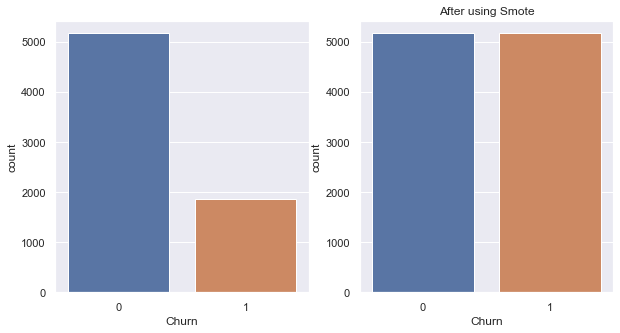

In [53]:
#Visualising class imbalance and after using smote

fig, ax = plt.subplots(1,2, figsize = (10,5),)

sns.countplot(y, ax =ax [0])
plt.title("Before using Smote")

sns.countplot(y_smote, ax =ax[1])
plt.title("After using Smote")

## Model Building

### Logistic Regression

In [54]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8180058083252663 on random_state 194


### Decision Tree

In [55]:
#Splitting Dataset into 80% Training and 20% testing Data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=194)

In [56]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 81.85 % 

Confusion Matrix of Decision Tree: 
 [[821 204]
 [171 870]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1025
           1       0.81      0.84      0.82      1041

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



array([[821, 204],
       [171, 870]], dtype=int64)

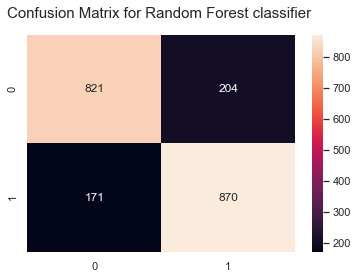

In [58]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Random Forest Classifier

In [59]:
#Model instantiating and traaining it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [60]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 86.00999999999999 % 

Confusion Matrix of Random Forest Classifier : 
 [[875 150]
 [139 902]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1025
           1       0.86      0.87      0.86      1041

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



array([[875, 150],
       [139, 902]], dtype=int64)

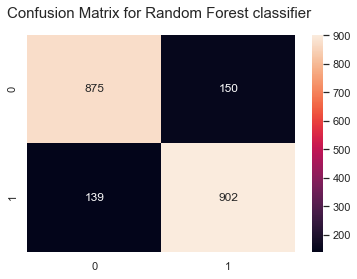

In [61]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Support Vector Classifier

In [62]:
#Instantiating SVC model and training it

svc  = SVC()
svc.fit(X_train,y_train)

SVC()

In [63]:
# Performing Evaluation metrics for our model
svcpred=svc.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,svcpred),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,svcpred), '\n')
print('Classification SVC: \n',classification_report(y_test,svcpred))

Accuracy Score for SVC is : 66.31 % 

Confusion Matrix of SVC: 
 [[738 287]
 [409 632]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68      1025
           1       0.69      0.61      0.64      1041

    accuracy                           0.66      2066
   macro avg       0.67      0.66      0.66      2066
weighted avg       0.67      0.66      0.66      2066



array([[738, 287],
       [409, 632]], dtype=int64)

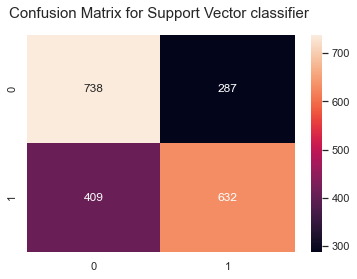

In [64]:
cm = confusion_matrix(y_test,svcpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,svcpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Support Vector classifier ', y=1.05, size=15)
cm

### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
#Instantiating SVC model and training it

grad = GradientBoostingClassifier()
grad.fit(X_train,y_train)

GradientBoostingClassifier()

In [67]:
# Performing Evaluation metrics for our model
gradpred=grad.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,gradpred),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,gradpred), '\n')
print('Classification SVC: \n',classification_report(y_test,gradpred))

Accuracy Score for SVC is : 84.66 % 

Confusion Matrix of SVC: 
 [[836 189]
 [128 913]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1025
           1       0.83      0.88      0.85      1041

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



array([[836, 189],
       [128, 913]], dtype=int64)

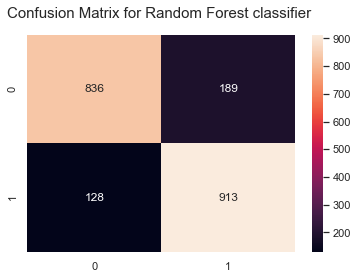

In [68]:
cm = confusion_matrix(y_test,gradpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,gradpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Baagging Classifier

In [69]:
#Instantiating model and fitting model

BG = BaggingClassifier()
BG.fit(X_train,y_train)

BaggingClassifier()

In [70]:
# Performing Evaluation metrics for our model
predbg=BG.predict(X_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,predbg),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,predbg), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,predbg))

Accuracy Score for Bagging Classifier is : 85.24000000000001 % 

Confusion Matrix of Bagging Classifier is : 
 [[884 141]
 [164 877]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1025
           1       0.86      0.84      0.85      1041

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



array([[884, 141],
       [164, 877]], dtype=int64)

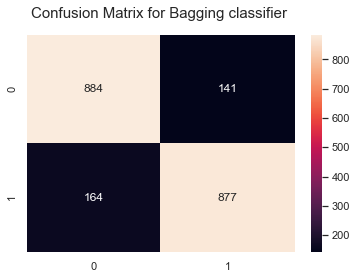

In [71]:
cm = confusion_matrix(y_test,predbg)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbg),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Bagging classifier ', y=1.05, size=15)
cm

### K Nearest Neighbor

In [72]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.77

In [73]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))


Accuracy Score for KNN is : 79.14 % 

Confusion Matrix of KNN: 
 [[756 269]
 [162 879]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      1025
           1       0.77      0.84      0.80      1041

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



array([[756, 269],
       [162, 879]], dtype=int64)

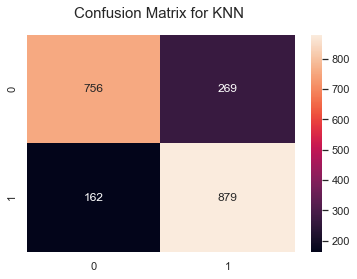

In [74]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm


### Adaboost Classifier

In [75]:
#Instantiating model and fitting model

adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [76]:
# Performing Evaluation metrics for our model
predada=adaboost.predict(X_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predada), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predada))

Accuracy Score for AdaBoost is : 83.83 % 

Confusion Matrix of AdaBoost : 
 [[822 203]
 [131 910]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1025
           1       0.82      0.87      0.84      1041

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



array([[822, 203],
       [131, 910]], dtype=int64)

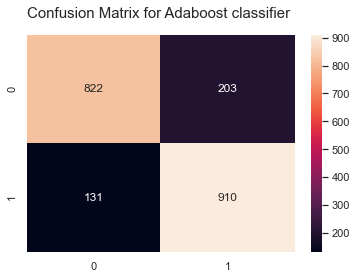

In [77]:
cm = confusion_matrix(y_test,predada)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predada),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Adaboost classifier ', y=1.05, size=15)
cm

### Xtreme Gradient Boosting

In [78]:
#Instantiating model and fitting model

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[14:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# Performing Evaluation metrics for our model
xgbpred=xgb.predict(X_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,xgbpred),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,xgbpred), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,xgbpred))

Accuracy Score for Bagging Classifier is : 86.25 % 

Confusion Matrix of Bagging Classifier is : 
 [[879 146]
 [138 903]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1025
           1       0.86      0.87      0.86      1041

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



#### Evaluation using Cross Validation Scores

In [80]:
CVscore_LR = cross_val_score(LR,X_smote,y_smote,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_DT = cross_val_score(DT,X_smote,y_smote,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X_smote,y_smote,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_smote,y_smote,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_grad = cross_val_score(grad,X_smote,y_smote,cv = 10 )
print("Cross validation score of Gradient Boosting Classifier is :",round(CVscore_grad.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(adaboost,X_smote,y_smote,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_xgb = cross_val_score(xgb,X_smote,y_smote,cv = 10 )
print("Cross validation score of XGB Classifier is :",round(CVscore_xgb.mean(),4)*100,'%')

CVscore_BG = cross_val_score(BG,X_smote,y_smote, cv = 10)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation score of Logistic Regression is : 79.33 %
Cross validation score of Decision Tree is : 78.64 %
Cross validation score of KNeighbors Classifier : 77.82 %
Cross validation score of Random Forest Classifier : 84.57000000000001 %
Cross validation score of Gradient Boosting Classifier is : 82.63000000000001 %
Cross validation score of AdaBoost Classifier is : 81.55 %
[14:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior

## Plotting ROC-AUC Curve

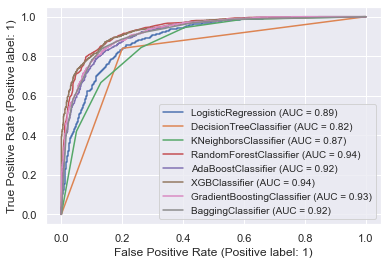

In [81]:
disp = plot_roc_curve(LR,X_test,y_test)

plot_roc_curve(DT ,X_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)

plot_roc_curve(RF,X_test,y_test, ax=disp.ax_)

plot_roc_curve(adaboost,X_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax=disp.ax_)

plot_roc_curve(grad,X_test,y_test, ax=disp.ax_)

plot_roc_curve(BG,X_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc = 'best')


plt.show()

### Conclusion :
- Among all other models Random Forest Boosting Classification Model seems to giving us high scores among all evaluation metrics : 
    - Accuracy Score: 0.86
    - Precision : 0.86
    - Recall : 0.86
    - F1 : 0.86
    - Cross validation : 0.84
    - Auc Score : 0.94

### Hyperparameter Tuning of our Best Model :

In [87]:
params = {'min_samples_leaf':[1,2,3,4,5],
         'n_estimators' : [70,80,90,100],
         'criterion' : ['gini','entropy'],
         'max_depth':[3,5,7,9],
         'min_samples_split':[2,3,4,5,6]}

In [88]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [89]:
#fitting our random search cv model
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.6s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [90]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'criterion': 'gini'}

In [91]:
model = RandomForestClassifier(n_estimators = 80, min_samples_split = 6, min_samples_leaf = 4, max_depth = 9, criterion = 'gini')

In [92]:
#Fitting our Tuned Model
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=80)

In [94]:
# Performing Evaluation metrics for our model
y_pred = model.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,y_pred))

Accuracy Score for Random Forest Classifier is : 85.09 % 

Confusion Matrix of Random Forest Classifier : 
 [[839 186]
 [122 919]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1025
           1       0.83      0.88      0.86      1041

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



array([[839, 186],
       [122, 919]], dtype=int64)

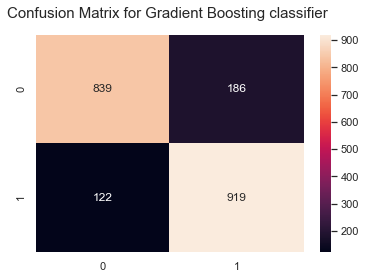

In [95]:
cm = confusion_matrix(y_test,y_pred)

#visualize confusion matrix 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Gradient Boosting classifier ', y=1.05, size=15)
cm

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

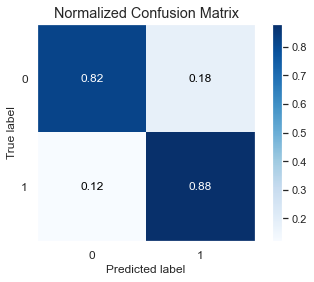

In [96]:
#Plotting Confusion Matrix Gradient Boosting Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Saving our Final Model

In [97]:
joblib.dump(model,"CustomerChurnAnalysis.pkl")

['CustomerChurnAnalysis.pkl']

## Loading our Final Model 

In [98]:
Model = joblib.load("CustomerChurnAnalysis.pkl")

In [99]:
#predicting test data using loaded model
prediction = Model.predict(X_test)
prediction

array([1, 1, 0, ..., 1, 0, 1])

In [100]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,1,0.0
1,1,0.0
2,0,1.0
3,1,0.0
4,0,1.0
...,...,...
2061,1,1.0
2062,1,0.0
2063,1,0.0
2064,0,0.0


In [101]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)